# ABE 516X - Homework #4 - Linear Regression

The data I used for this assignment I found online and represents car sales for a variety of vehicles in a certain year.
I wanted to look at how several different characteristics of the vehicle affected the retail price of the vehicle.
After importing the data set I plotted several of the characteristics to see if there was a somewhat linear relationship.
Of the ones that I plotted Engine size, engine horsepower and vehicle weight appeared to have the most linear relationships.
I created linear models for these 3 metrics with regards to retail price. The plots for these can be found below.
After creating the model and plotting it versus the data the summary statistics were calculated using the stat package.
The best relationship was found between the horsepower and price with an R-squared value of 0.697.

In [2]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
# importing data
cars = pd.read_csv('cars.csv')
print(len(cars))

387


In [4]:
cars.head()

,Unnamed: 0,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width,Class
0,Acura 3.5 RL,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72,Sedan
1,Acura 3.5 RL Navigation,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72,Sedan
2,Acura MDX,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77,SUV
3,Acura NSX S,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71,Sports
4,Acura RSX,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68,Sedan


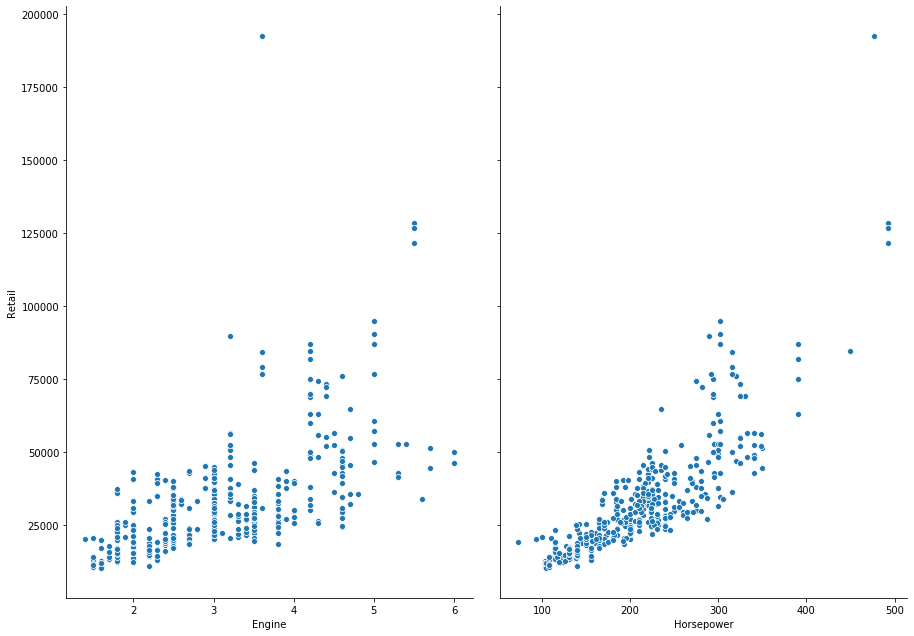

In [5]:
sns.pairplot(cars, x_vars=['Engine','Horsepower'], y_vars='Retail',height=9,aspect=0.7)

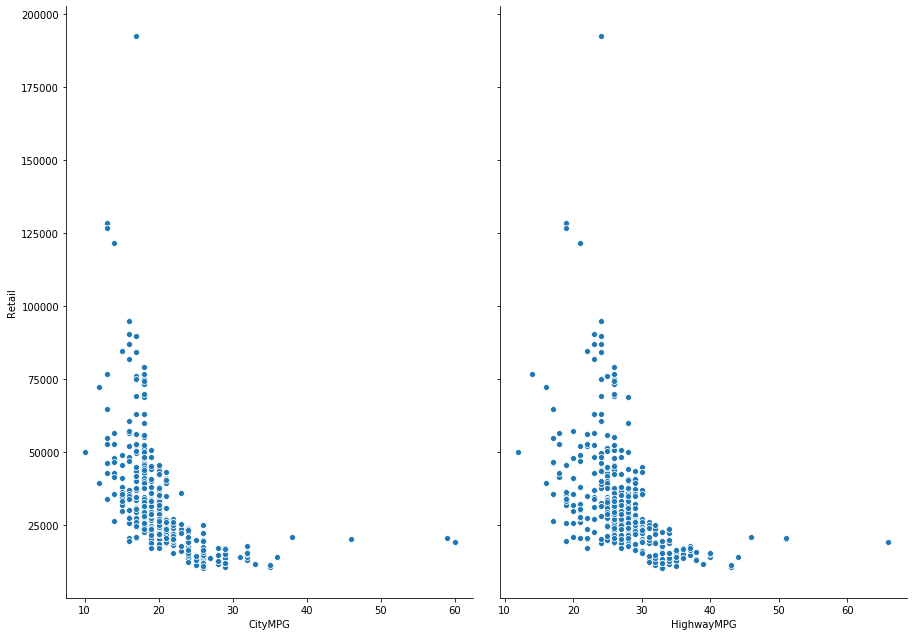

In [6]:
sns.pairplot(cars, x_vars=['CityMPG','HighwayMPG'], y_vars='Retail',height=9,aspect=0.7)

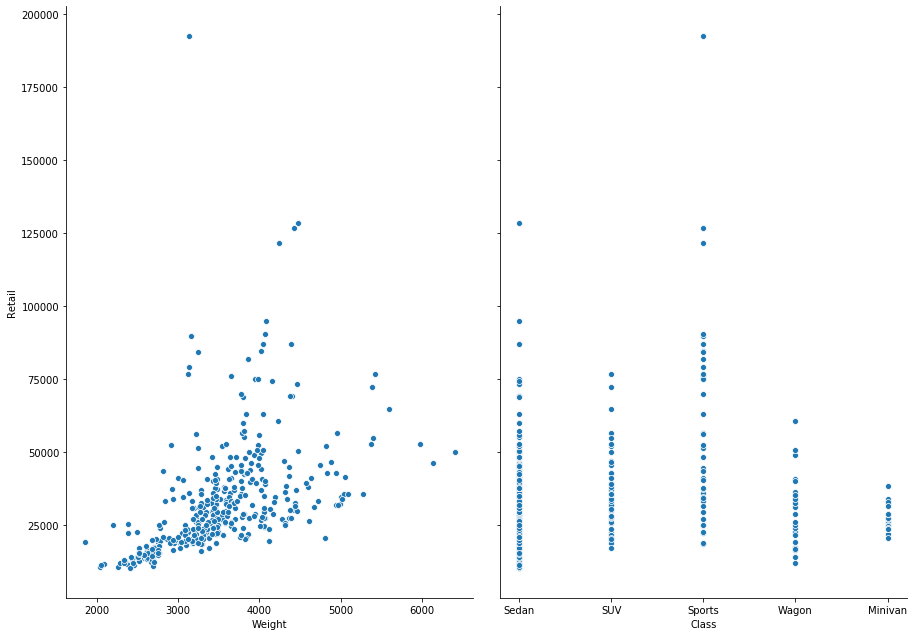

In [7]:
sns.pairplot(cars, x_vars=['Weight','Class'], y_vars='Retail',height=9,aspect=0.7)

In [8]:
# Creating Variables for data that appeared linear
Price = cars['Retail'] 
Engine = cars['Engine']
HP = cars['Horsepower']
Weight = cars['Weight']

In [9]:
E_model = LinearRegression(fit_intercept=True)
HP_model = LinearRegression(fit_intercept=True)
W_model = LinearRegression(fit_intercept=True)

In [10]:
Engine_ = Engine[:,np.newaxis]
HP_ = HP[:,np.newaxis]
Weight_ = Weight[:,np.newaxis]

In [11]:
HP_.shape

(387, 1)

In [12]:
Engine_mod = E_model.fit(Engine_,Price)
HP_mod = HP_model.fit(HP_,Price)
Weight_mod = W_model.fit(Weight_,Price)

In [13]:
print(Engine_mod.coef_)
print(Engine_mod.intercept_)
print(HP_mod.coef_)
print(HP_mod.intercept_)
print(Weight_mod.coef_)
print(Weight_mod.intercept_)

[11656.40973555]
-3222.960472689112
[234.42725402]
-17040.441372475398
[13.29852318]
-13745.285263114223


In [14]:
engine_fit = np.linspace(1,6.2)
engine_fit = engine_fit[:,np.newaxis]
hp_fit = np.linspace(70,500)
hp_fit = hp_fit[:,np.newaxis]
weight_fit = np.linspace(1750,6500)
weight_fit = weight_fit[:,np.newaxis]

In [15]:
engine_pred = Engine_mod.predict(engine_fit)
hp_pred = HP_mod.predict(hp_fit)
weight_pred = Weight_mod.predict(weight_fit)

Text(0, 0.5, 'Price ($)')

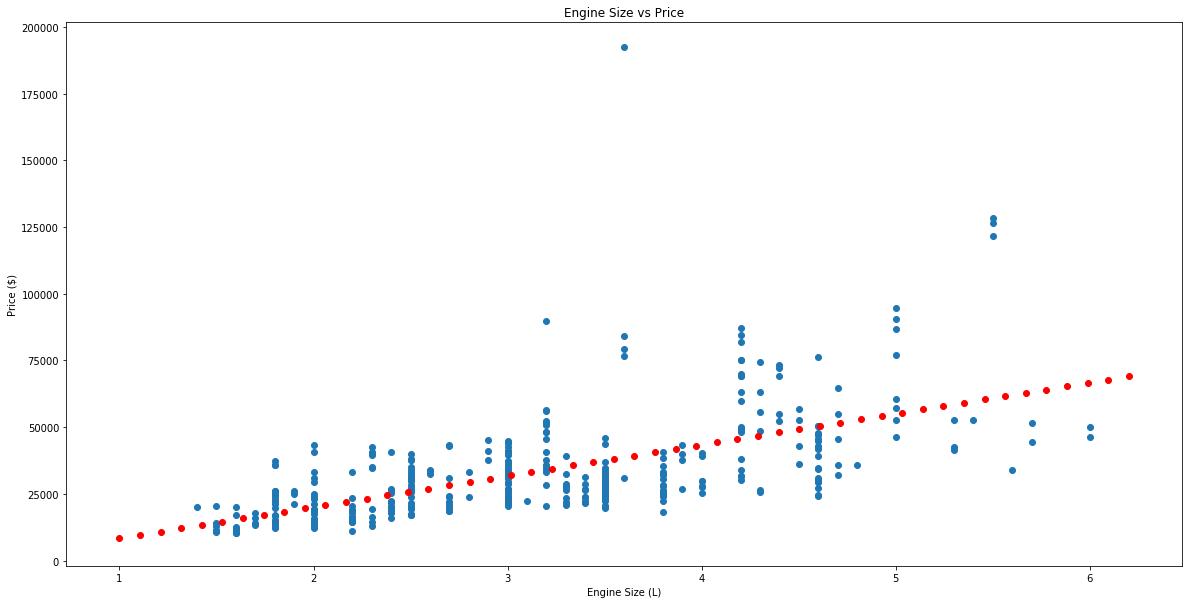

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(Engine,Price)
plt.scatter(engine_fit,engine_pred,color='red')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

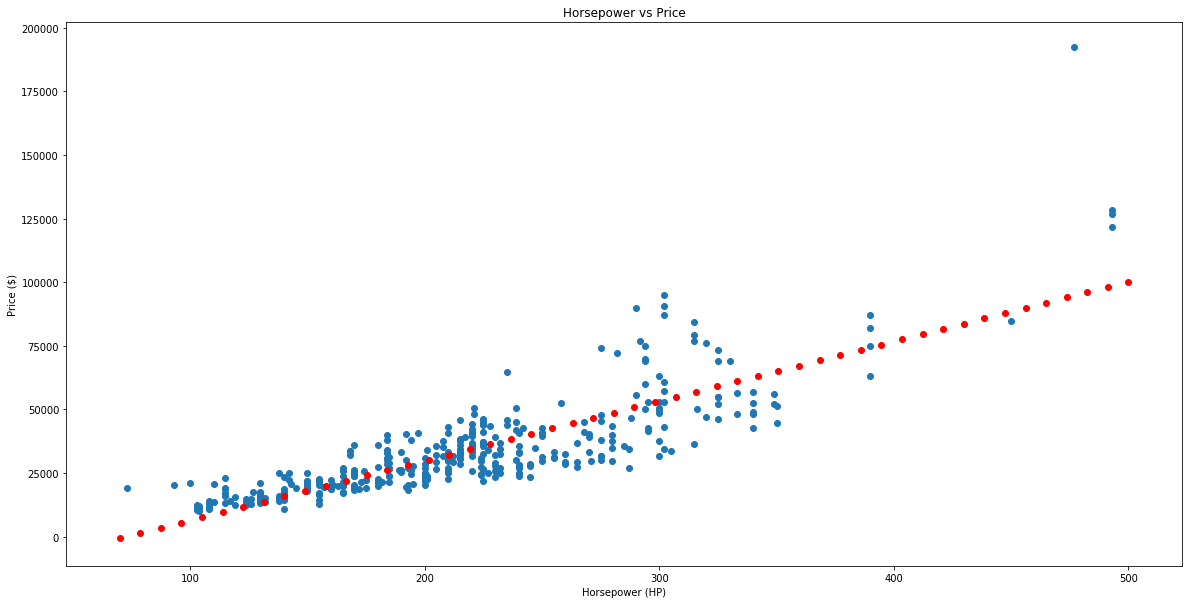

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(HP,Price)
plt.scatter(hp_fit,hp_pred,color='red')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

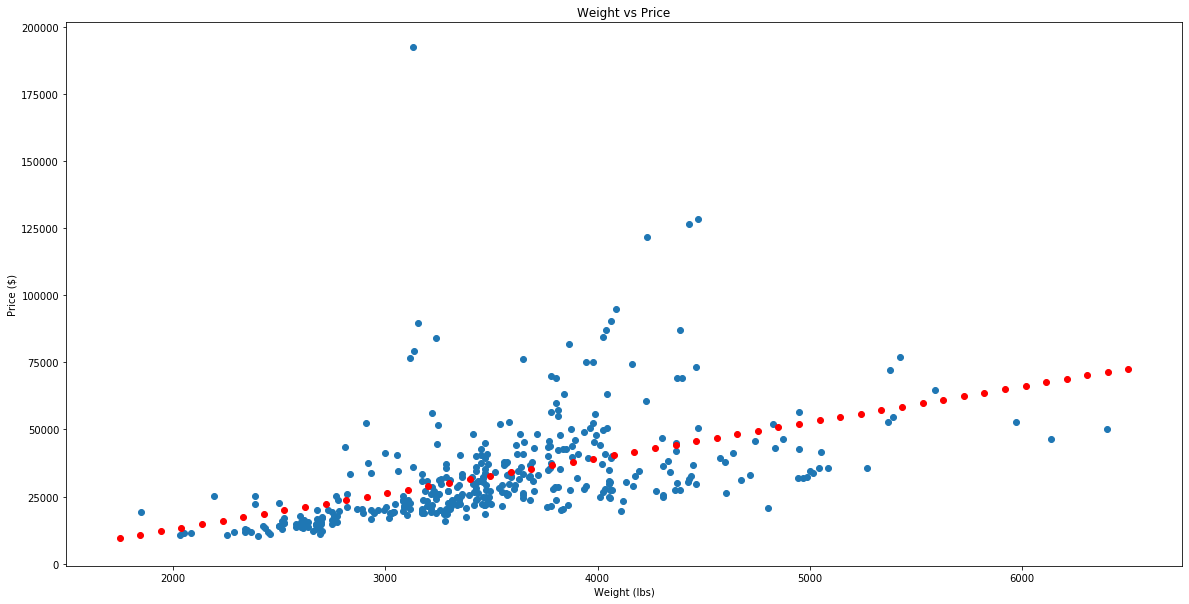

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(Weight,Price)
plt.scatter(weight_fit,weight_pred,color='red')
plt.title('Weight vs Price')
plt.xlabel('Weight (lbs)')
plt.ylabel('Price ($)')

In [20]:
Engine_model_stat = smf.ols(formula='Retail ~ Engine', data=cars).fit()
print(Engine_model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Retail   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.08e-39
Time:                        18:04:23   Log-Likelihood:                -4289.8
No. Observations:                 387   AIC:                             8584.
Df Residuals:                     385   BIC:                             8591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3222.9605   2607.841     -1.236      0.2

In [21]:
HP_model_stat = smf.ols(formula='Retail ~ Horsepower', data=cars).fit()
print(HP_model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Retail   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     887.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):          5.87e-102
Time:                        18:05:32   Log-Likelihood:                -4144.6
No. Observations:                 387   AIC:                             8293.
Df Residuals:                     385   BIC:                             8301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.704e+04   1775.942     -9.595      0.0

In [22]:
Weight_model_stat = smf.ols(formula='Retail ~ Weight', data=cars).fit()
print(Weight_model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                 Retail   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.81e-23
Time:                        18:05:54   Log-Likelihood:                -4326.2
No. Observations:                 387   AIC:                             8656.
Df Residuals:                     385   BIC:                             8664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.375e+04   4510.686     -3.047      0.0